# Daily Climate Times Series Data

Base de dados extraída do Kaggle, link: https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
archive = 'data/DailyDelhiClimateTrain.csv'

base = pd.read_csv(archive, parse_dates=True, index_col=['date'])
base

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


## Time series decomposition (Humidity)

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (13,5)

In [5]:
result = seasonal_decompose(base['humidity'], model='multiplicative')

<AxesSubplot:title={'center':'Humidity'}, xlabel='date'>

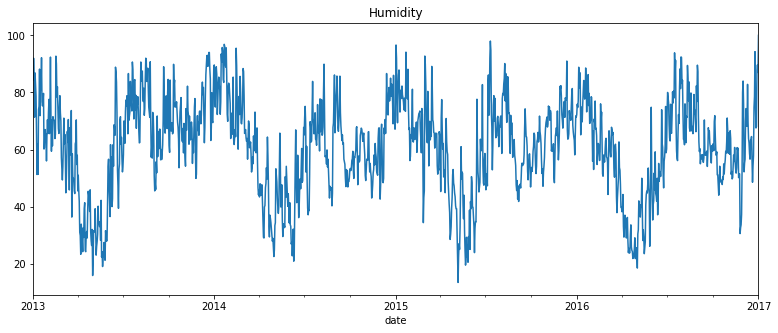

In [6]:
base['humidity'].plot(title='Humidity')

<AxesSubplot:title={'center':'Trend'}, xlabel='date'>

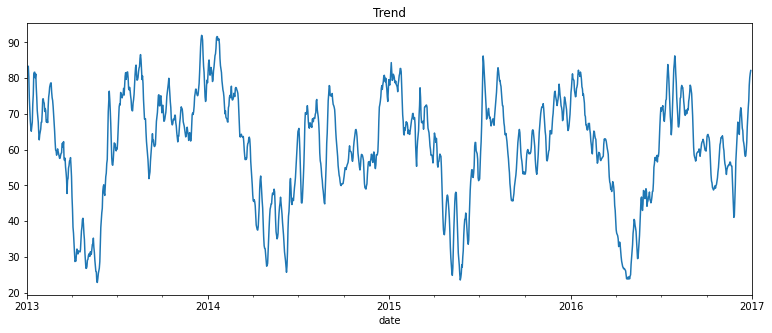

In [7]:
result.trend.plot(title='Trend')

<AxesSubplot:title={'center':'Seasonality'}, xlabel='date'>

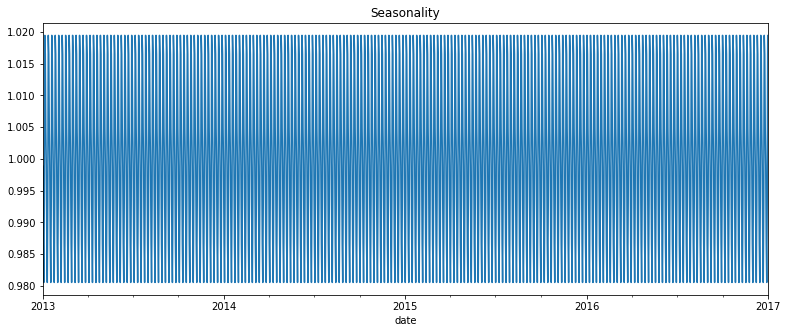

In [8]:
result.seasonal.plot(title='Seasonality')

<AxesSubplot:title={'center':'resid'}, xlabel='date'>

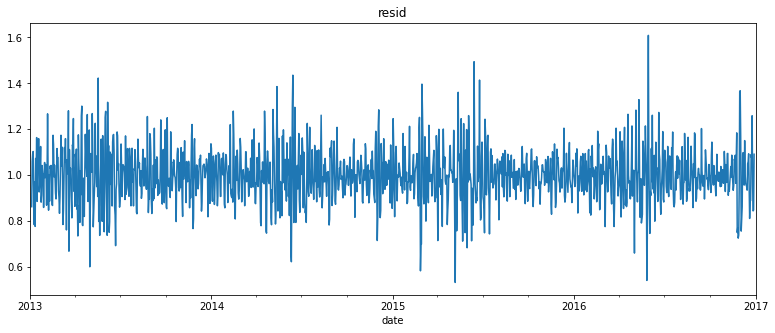

In [9]:
result.resid.plot(title='resid')

## SMA - Médias Móveis Simples

In [16]:
# Meantemp
base['7-days-SMA'] = base['meantemp'].rolling(window=7).mean()
base['30-days-SMA'] = base['meantemp'].rolling(window=30).mean()

In [17]:
base

,meantemp,humidity,wind_speed,meanpressure,7-days-SMA,30-days-SMA
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN
...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.480592,18.164807
2016-12-29,15.238095,87.857143,6.000000,1016.904762,16.188075,17.952373
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.980252,17.759896


<AxesSubplot:xlabel='date'>

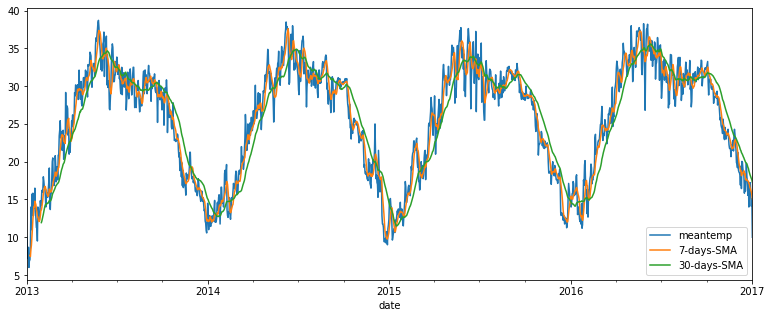

In [18]:
base[['meantemp','7-days-SMA', '30-days-SMA']].plot()

## EWMA - Médias Móveis Ponderadas Exponenciais

In [20]:
#MeanTemp
base['ewma-30'] = base['meantemp'].ewm(span=30,adjust=False).mean()

<AxesSubplot:xlabel='date'>

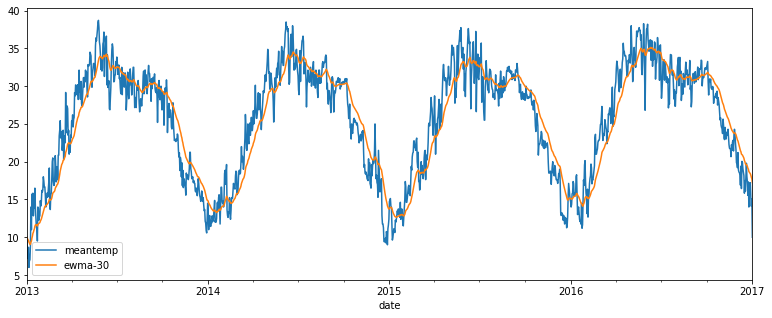

In [21]:
base[['meantemp','ewma-30']].plot()

## Comparando SMA with EWMA

<AxesSubplot:xlabel='date'>

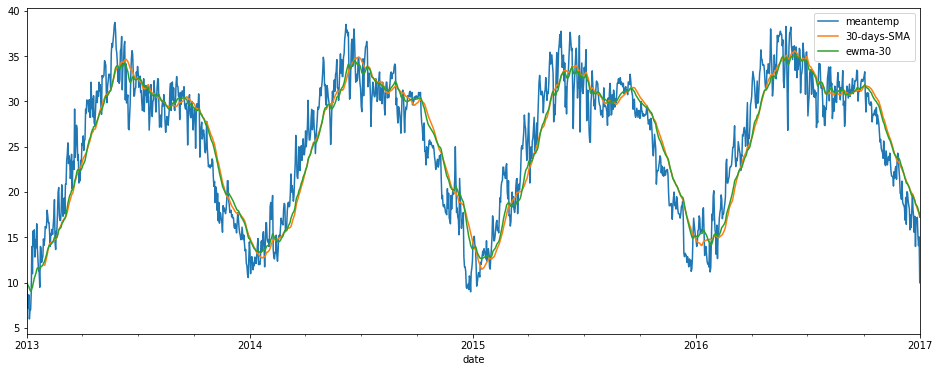

In [25]:
base[['meantemp','30-days-SMA', 'ewma-30']].plot(figsize=(16,6))